#### 1 - Manivarsh Adi

#### 2 - Vishwa Teja Reddy Dontireddy

#### 3 - Sneha Thallapaka

#### 4 - Suhail Mohammed

#### 5 - Sai Vinuthna Tata

## Heart Attack Analysis & Prediction Dataset
Source - https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

## Description of Data

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca : number of major vessels (0-3)

cp : Chest Pain type

    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 4: asymptomatic
    
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

         Value 0: normal
         Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
         Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
         thalach : maximum heart rate achieved

output : 0= less chance of heart attack 1= more chance of heart attack

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [80]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Dropout,SimpleRNN,LSTM

In [81]:
heart_data = pd.read_csv("heart.csv")

In [82]:
y = heart_data['output']

In [83]:
heart_data_wo = heart_data.drop(columns=['output'])

In [84]:
y.value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [85]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [86]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [87]:
heart_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## Hist Plot, Probability Plot and Box Plot for continous features

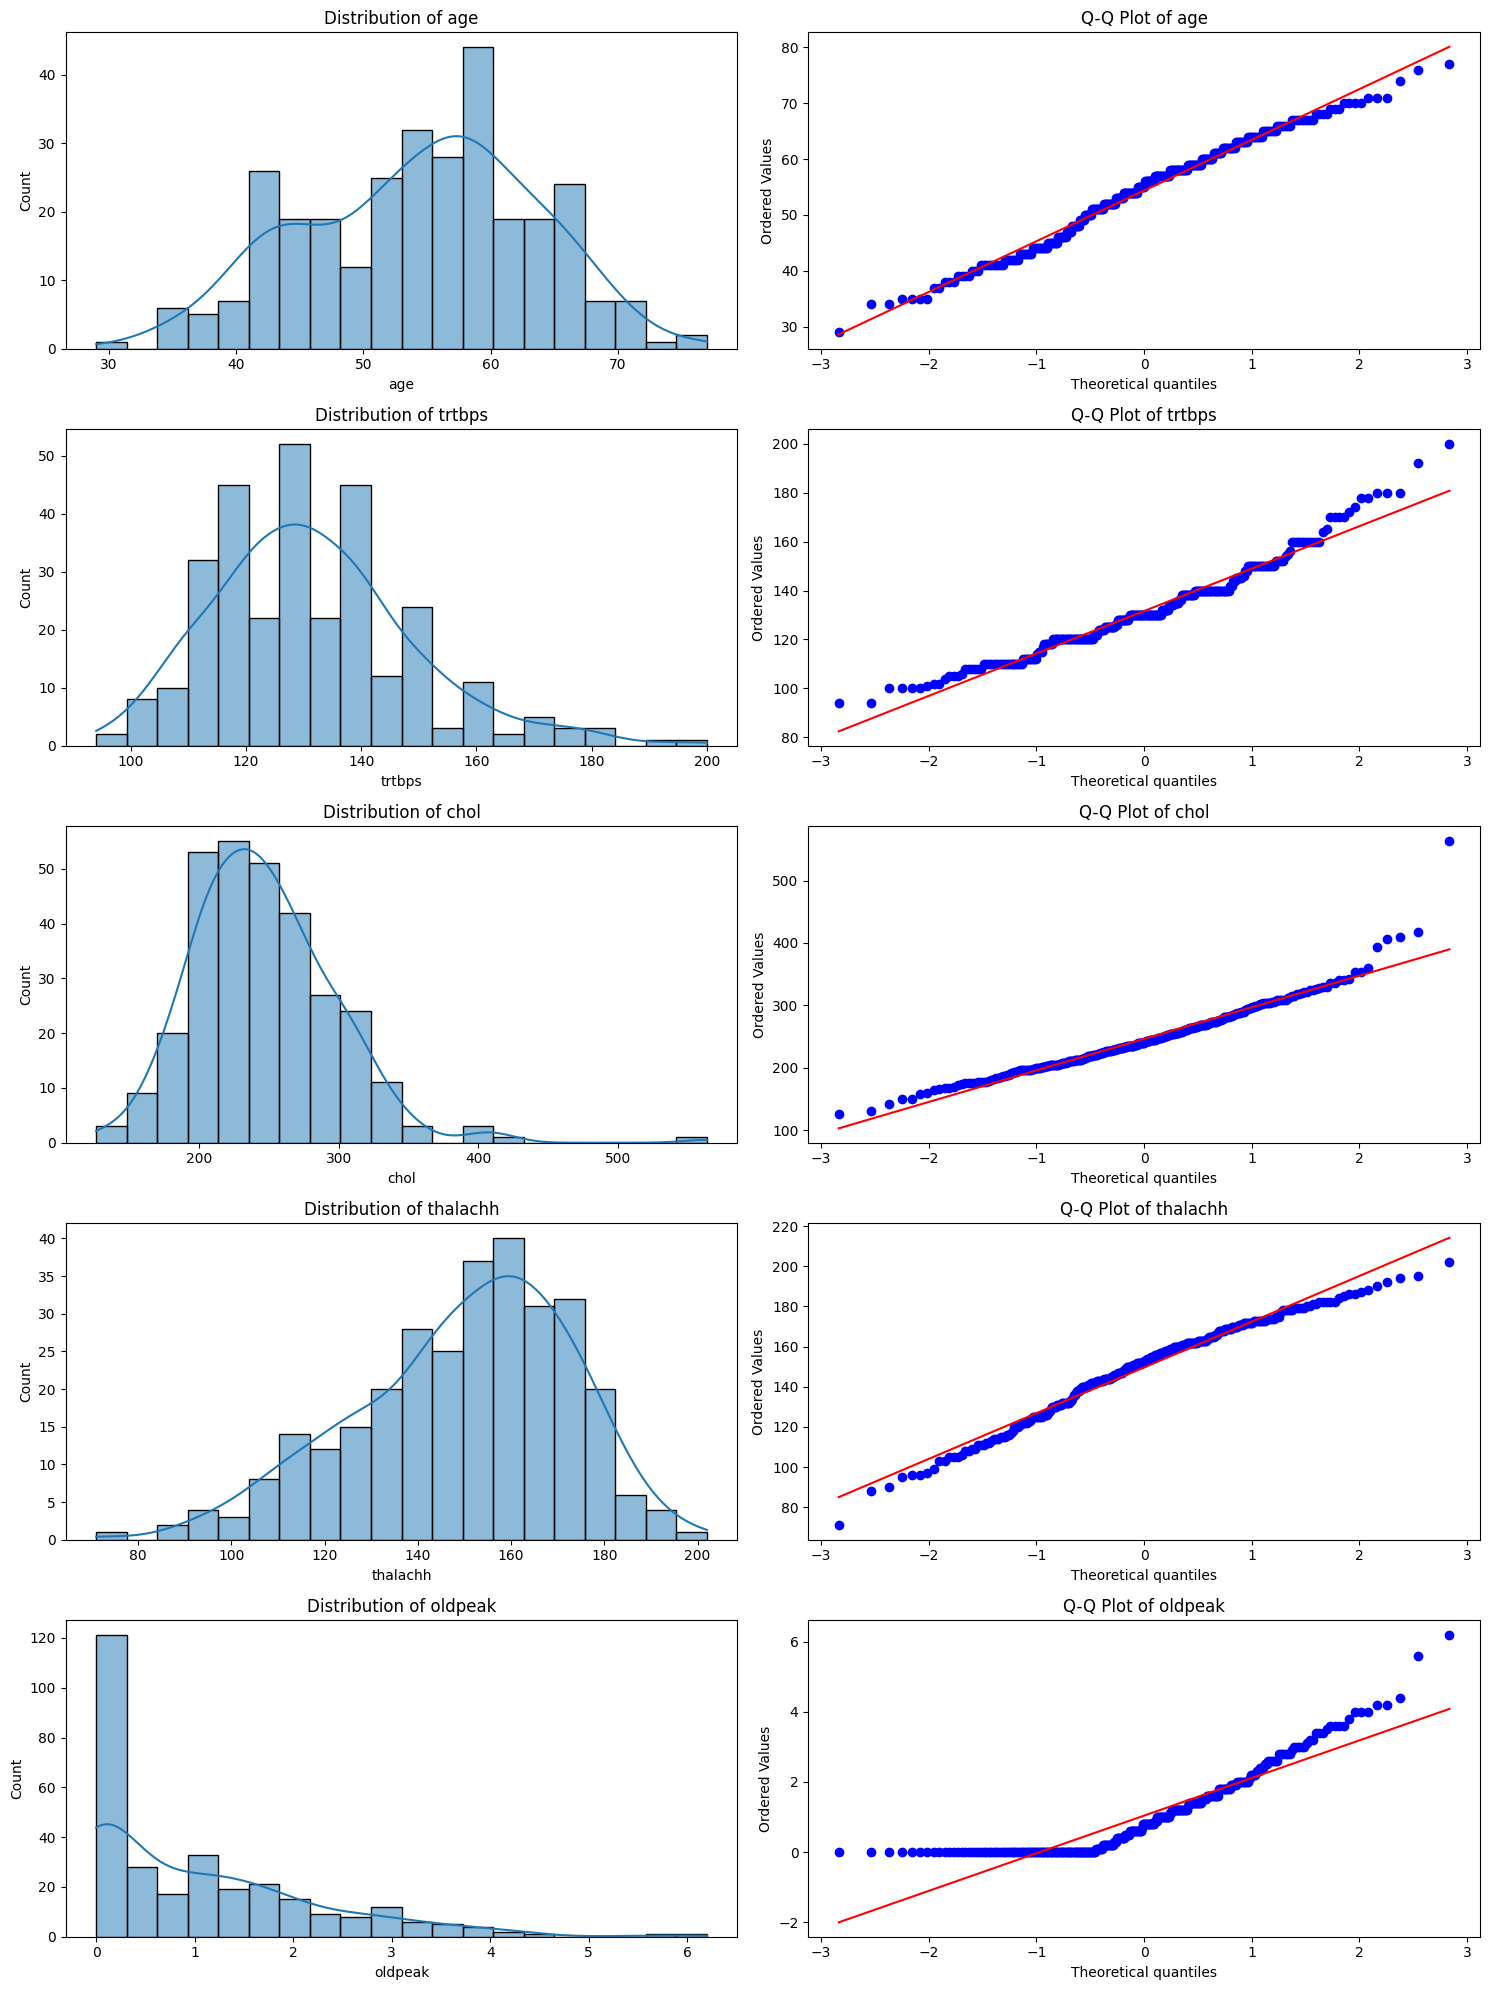

In [88]:
df_continuous = heart_data[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']]

fig, axes = plt.subplots(5, 2, figsize=(15, 20))

for i, col in enumerate(df_continuous.columns):
    row = i

    # Plot the histogram
    sns.histplot(df_continuous[col], bins=20, kde=True, ax=axes[row, 0])
    axes[row, 0].set_title(f'Distribution of {col}')

    # Plot the Q-Q plot
    stats.probplot(df_continuous[col], dist="norm", plot=axes[row, 1])
    axes[row, 1].set_title(f'Q-Q Plot of {col}')

    # Plot the box plot
    # sns.boxplot(y=df_continuous[col], ax=axes[row, 2])
    # axes[row, 2].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

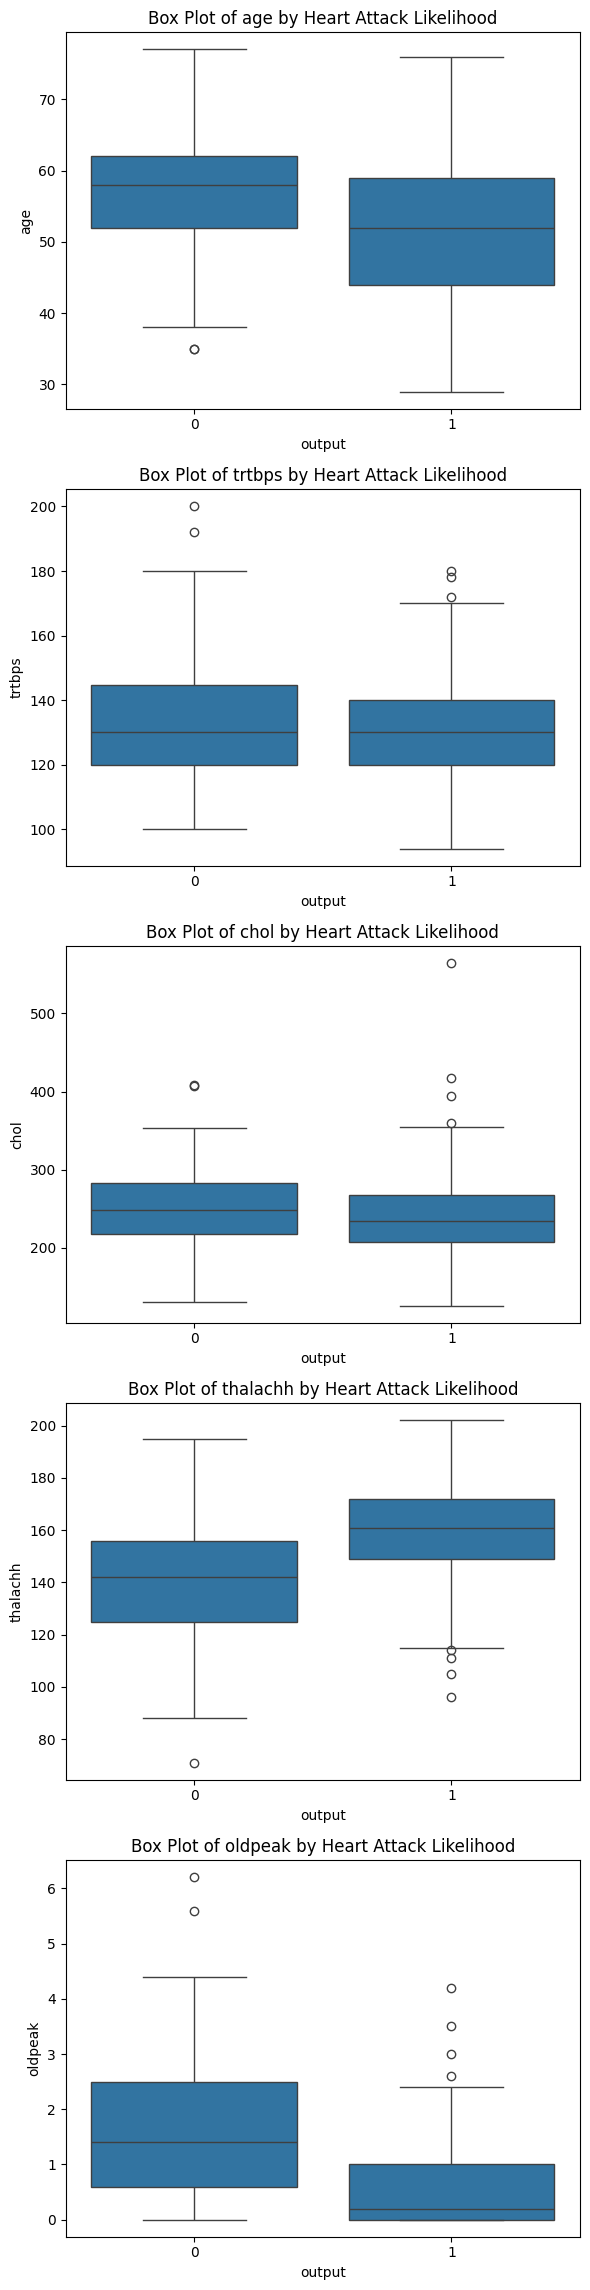

In [89]:
# Box plot for continous features
fig, axes = plt.subplots(len(df_continuous.columns), 1, figsize=(6, 23))

for i, col in enumerate(df_continuous.columns):
    sns.boxplot(x='output', y=col, data=heart_data, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col} by Heart Attack Likelihood')

plt.tight_layout()
plt.show()

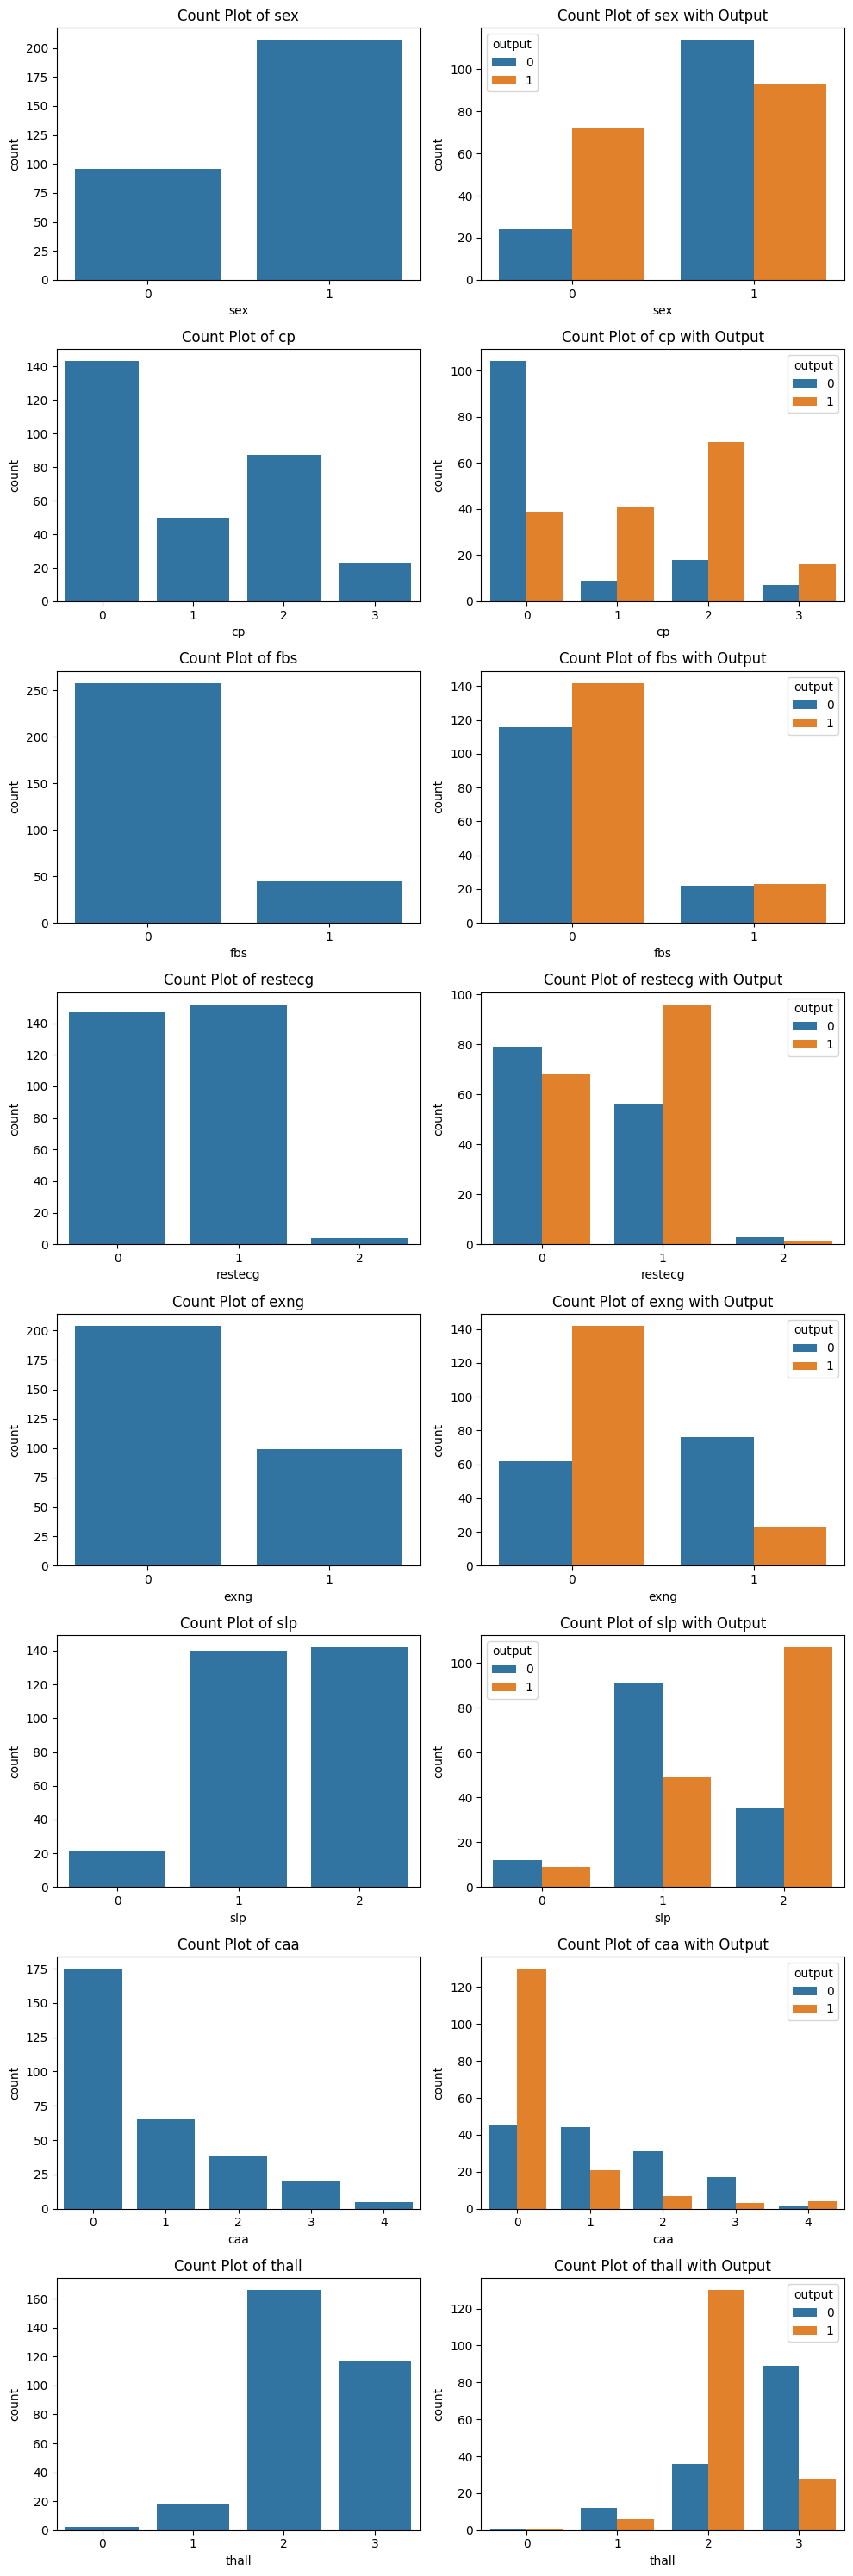

In [90]:
# Count Plot of binary features and with 'output'
df_binary = heart_data[['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']]

fig, axes = plt.subplots(8, 2, figsize=(10, 30))

for i, col in enumerate(df_binary.columns):
    row = i

    # Plot the count plot
    sns.countplot(x=col, data=heart_data,  ax=axes[row, 0])
    axes[row, 0].set_title(f'Count Plot of {col}')

    # Plot count plot with output
    sns.countplot(x=col, hue='output', data=heart_data, ax=axes[row, 1])
    axes[row, 1].set_title(f'Count Plot of {col} with Output')

plt.tight_layout()
plt.show()

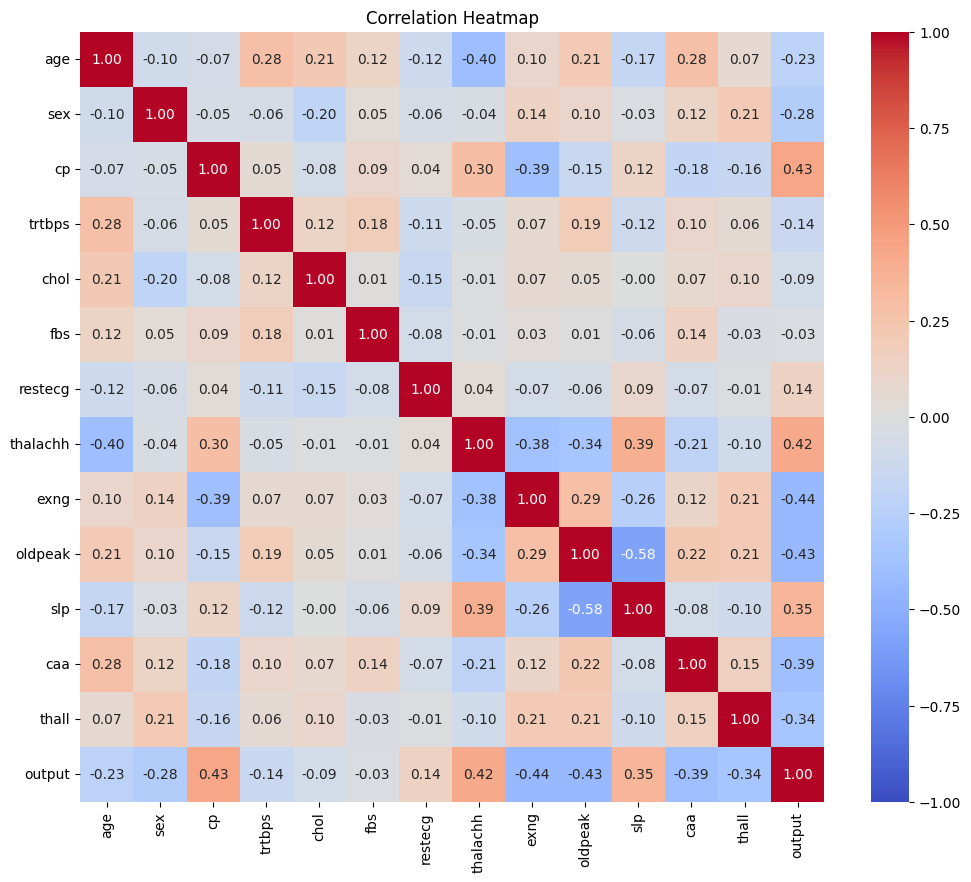

In [91]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
corr = heart_data.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Interpret the correlation matrix
- Positive correlation: as the value of one variable increases, the value of the other variable also tends to increase.
- Negative correlation: as the value of one variable increases, the value of the other variable tends to decrease.
- Strong correlation: the closer the value is to 1 or -1, the stronger the correlation.
- Weak correlation: the closer the value is to 0, the weaker the correlation.


We can observe from the correlation matrix as
- 'Output' is having moderate positive correlation with cp (chest pain), thalachh (maximum heart rate achieved) and slp (slope of peak excercise ST segment). This sugests that patients with chest pain, higher heart rates and slope of the peak exercise ST segment are more likely to have a heart attack.
- Output is moderate negative correlation with exng (exercise-induced angina), oldpeak (ST depression induced by exercise relative to rest) and caa (number of major vessels colored by fluoroscopy). This means that patients with fewer excercises, ST depression induced by exercise relative to rest and number of major vessels colored by fluoroscopy are more likely to have a heart attack.
- Output is weakly correlated with  fbs (fasting blood sugar) and chol (serum cholesterol). This means that these factors have little/no impact on the likelihood of a heart attack.

## Model Building With Feature Selection

### Model 1

In [92]:
from scipy.stats import ttest_ind

# Separate the data into two groups based on the 'output' variable
group0 = heart_data[heart_data['output'] == 0]
group1 = heart_data[heart_data['output'] == 1]

# Perform t-tests for each feature
features = heart_data.columns.drop('output')
t_test_results = []

for feature in features:
    t_stat, p_val = ttest_ind(group0[feature], group1[feature], nan_policy='omit')
    t_test_results.append((feature, t_stat, p_val))

# Create a DataFrame to display the results
t_test_df = pd.DataFrame(t_test_results, columns=['Feature', 'T-Statistic', 'P-Value'])
t_test_df

,Feature,T-Statistic,P-Value
0,age,4.014561,7.524801e-05
1,sex,5.078601,6.678692e-07
2,cp,-8.352980,2.469712e-15
3,trtbps,2.541293,1.154606e-02
4,chol,1.484245,1.387903e-01
5,fbs,0.486767,6.267775e-01
6,restecg,-2.403583,1.683990e-02
7,thalachh,-8.069703,1.697338e-14
8,exng,8.423327,1.520814e-15
9,oldpeak,8.279580,4.085346e-15


In [93]:
# Select features with p-value <= 0.05
significant_features = t_test_df[t_test_df['P-Value'] <= 0.05]['Feature'].tolist()

print(f"Significant features (p-value <= 0.05) are {significant_features}")

Significant features (p-value <= 0.05) are ['age', 'sex', 'cp', 'trtbps', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']


The t-test reveal that most features show statistically significant differences between the two groups, except for 'cholesterol' and 'fasting blood sugar'. This suggests that these features are important in distinguishing between individuals with different risks of heart attack. The features with very low p-values (exng, old peak, cp, thalachh) are particularly strong indicators of heart attack likelihood.

In [94]:
df_filtered = heart_data[significant_features + ['output']]
print(f"Filtered DataFrame shape: {df_filtered.shape}")

Filtered DataFrame shape: (303, 12)


In [95]:
X_selected = heart_data[significant_features]
print(X_selected.shape)

(303, 11)


In [96]:
y = heart_data['output']
print(y.shape)

(303,)


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.20, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 11), (61, 11), (242,), (61,))

In [98]:
model = Sequential(name="Model1")
model.add(Input(shape=(11,)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               1536      
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11905 (46.50 KB)
Trainable params: 11905 (46.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [99]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1000, verbose=0)
loss_and_accuracy = model.evaluate(X_test, y_test)
print('Loss = ',loss_and_accuracy[0])
print('Accuracy = ',loss_and_accuracy[1])

2/2 [==============================] - 0s 9ms/step - loss: 0.9441 - accuracy: 0.7705
Loss =  0.9440970420837402
Accuracy =  0.7704917788505554


## Model 2

### Applying SMOTE to correct the imbalance in the classes.

In [100]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(heart_data_wo, y)
X.shape

(330, 13)

In [101]:
y.value_counts()

output
1    165
0    165
Name: count, dtype: int64

In [102]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42, stratify=y)

### Applying Lasso for feature selection. Performing GridSearch to get the best param

In [104]:
# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, y)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 1e-05}


In [105]:
names=heart_data_wo.columns
print("Column Names: {}".format(names.values))

Column Names: ['age' 'sex' 'cp' 'trtbps' 'chol' 'fbs' 'restecg' 'thalachh' 'exng'
 'oldpeak' 'slp' 'caa' 'thall']


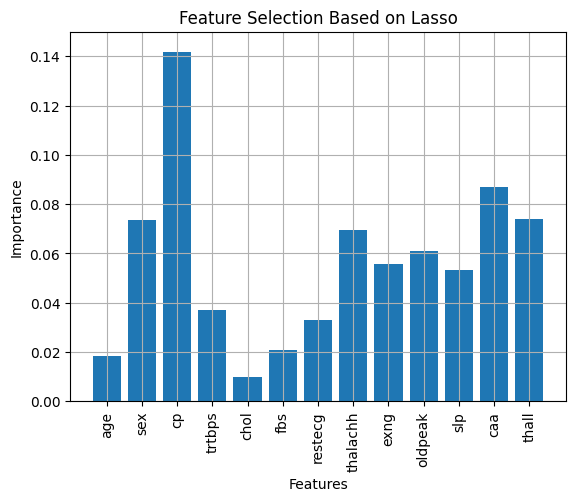

In [106]:
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train, y_train)
# print(lasso1_coef)
# Using np.abs() to make coefficients positive.
lasso1_coef = np.abs(lasso1.coef_)
# print(lasso1.)

# plotting the Column Names and Importance of Columns.
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()

### Selecting the feature based on the importance

In [107]:
feature_subset=np.array(names)[lasso1_coef>=0.04]
print("Selected Feature Columns: {}".format(feature_subset))

Selected Feature Columns: ['sex' 'cp' 'thalachh' 'exng' 'oldpeak' 'slp' 'caa' 'thall']


In [108]:
X_selected = X[feature_subset]
print(X_selected.shape)

(330, 8)


In [109]:
num_columns = X_train.shape[1]

### Added the dropout to help reduce overfitting since the data set is small

In [110]:
model = Sequential(name="Model2")
model.add(Input(shape=(num_columns,)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "Model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 128)               1792      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_29 (Dense)            (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 dense_31 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12161 (47.50 KB)
Trainable params: 12161 (47.5

In [111]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=1000, verbose=0)
training = model.evaluate(X_train, y_train)
loss_and_accuracy = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 7ms/step - loss: 2.5124 - accuracy: 0.7121


In [112]:
print('Training', training)
print('Loss = ',loss_and_accuracy[0])
print('Accuracy = ',loss_and_accuracy[1])

Training [0.001268608495593071, 1.0]
Loss =  2.512373685836792
Accuracy =  0.7121211886405945


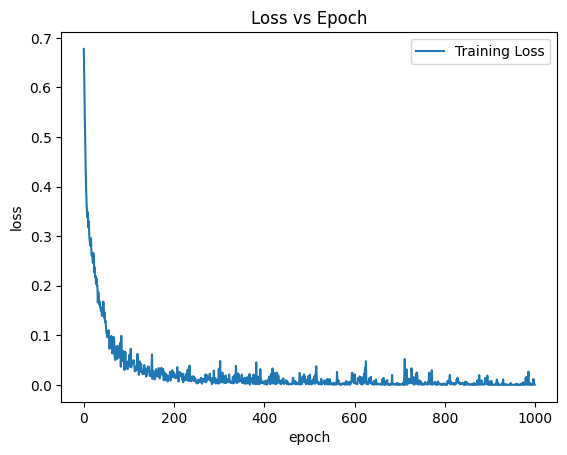

In [113]:
plt.plot( history.history['loss'], label='Training Loss')
plt.title('Loss vs Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

### Model 3

### Artificial Neural with all the features in the dataset with SMOTE

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [115]:
model = Sequential(name="Model3")
model.add(Input(shape=(13,)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "Model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 128)               1792      
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12161 (47.50 KB)
Trainable params: 12161 (47.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [116]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=500, verbose=0)
loss_and_accuracy = model.evaluate(X_test, y_test)
print(" Model Metrics",model.metrics_names)
print('Loss = ',loss_and_accuracy[0])
print('Accuracy = ',loss_and_accuracy[1])

3/3 [==============================] - 0s 6ms/step - loss: 0.5228 - accuracy: 0.8030
 Model Metrics ['loss', 'accuracy']
Loss =  0.5227932929992676
Accuracy =  0.8030303120613098


## Model 4

### Selecting the features based on correlation

In [117]:
corr = heart_data.corr()
corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [118]:
features = abs(corr['output'])
result = features[features>0.4]
result

cp          0.433798
thalachh    0.421741
exng        0.436757
oldpeak     0.430696
output      1.000000
Name: output, dtype: float64

In [119]:
X_selected = X[['cp','thalachh','exng','oldpeak']]

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.20, random_state=42, stratify=y)
X_train.head(1)

,cp,thalachh,exng,oldpeak
312,0,143,1,1.2


In [121]:
model = Sequential(name="Model4")
model.add(Input(shape=(4,)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "Model4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               640       
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dense_38 (Dense)            (None, 32)                2080      
                                                                 
 dense_39 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11009 (43.00 KB)
Trainable params: 11009 (43.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [122]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, verbose=0)
loss_and_accuracy = model.evaluate(X_test, y_test)
print('Loss = ',loss_and_accuracy[0])
print('Accuracy = ',loss_and_accuracy[1])

3/3 [==============================] - 0s 5ms/step - loss: 0.5433 - accuracy: 0.7879
Loss =  0.5432541370391846
Accuracy =  0.7878788113594055


## Model 5

In [123]:
from scipy.stats import chi2_contingency, f_oneway

# Chi-square test for categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

for feature in categorical_features:
    contingency_table = pd.crosstab(heart_data[feature], heart_data['output'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f'Chi-square test for {feature}: p-value = {p}')

# ANOVA for numerical features
numerical_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

group0 = heart_data[heart_data['output'] == 0]
group1 = heart_data[heart_data['output'] == 1]

for feature in numerical_features:
    f_stat, p_val = f_oneway(group0[feature], group1[feature])
    print(f'ANOVA for {feature}: p-value = {p_val}')

Chi-square test for sex: p-value = 1.8767776216941503e-06
Chi-square test for cp: p-value = 1.3343043373050064e-17
Chi-square test for fbs: p-value = 0.7444281114149577
Chi-square test for restecg: p-value = 0.006660598773498031
Chi-square test for exng: p-value = 7.454409331235655e-14
Chi-square test for slp: p-value = 4.830681934276837e-11
Chi-square test for caa: p-value = 2.712470211959332e-15
Chi-square test for thall: p-value = 2.2333507210129364e-18
ANOVA for age: p-value = 7.524801303442268e-05
ANOVA for trtbps: p-value = 0.011546059200233376
ANOVA for chol: p-value = 0.1387903269560108
ANOVA for thalachh: p-value = 1.6973376386560805e-14
ANOVA for oldpeak: p-value = 4.085346391354563e-15


In [124]:
# Select dependent features
dependent_features = ['sex', 'cp', 'restecg', 'exng', 'slp', 'caa', 'thall', 'age', 'trtbps', 'thalachh', 'oldpeak']
X = heart_data[dependent_features].values
y = heart_data['output'].values

In [125]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape

(242, 11)

In [127]:
# Reshape data for RNN (samples, time steps, features)
X_train_rnn = np.expand_dims(X_train, axis=1)
X_test_rnn = np.expand_dims(X_test, axis=1)
print("Shape of X_train_rnn:", X_train_rnn.shape)
print("Shape of X_test_rnn:", X_test_rnn.shape)

Shape of X_train_rnn: (242, 1, 11)
Shape of X_test_rnn: (61, 1, 11)


In [128]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(32, input_shape=(1, X_train.shape[1]), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test_rnn, y_test)
print(f'Test Accuracy: {accuracy}')

Epoch 1/50
7/7 [==============================] - 3s 160ms/step - loss: 0.6422 - accuracy: 0.6425 - val_loss: 0.5914 - val_accuracy: 0.6735
Epoch 2/50
7/7 [==============================] - 0s 26ms/step - loss: 0.6030 - accuracy: 0.6943 - val_loss: 0.5631 - val_accuracy: 0.7143
Epoch 3/50
7/7 [==============================] - 0s 26ms/step - loss: 0.5737 - accuracy: 0.7358 - val_loss: 0.5383 - val_accuracy: 0.7347
Epoch 4/50
7/7 [==============================] - 0s 20ms/step - loss: 0.5497 - accuracy: 0.7617 - val_loss: 0.5188 - val_accuracy: 0.7551
Epoch 5/50
7/7 [==============================] - 0s 27ms/step - loss: 0.5298 - accuracy: 0.7979 - val_loss: 0.5025 - val_accuracy: 0.7959
Epoch 6/50
7/7 [==============================] - 0s 16ms/step - loss: 0.5119 - accuracy: 0.8187 - val_loss: 0.4867 - val_accuracy: 0.7959
Epoch 7/50
7/7 [==============================] - 0s 11ms/step - loss: 0.4941 - accuracy: 0.8187 - val_loss: 0.4714 - val_accuracy: 0.8367
Epoch 8/50
7/7 [==========

## Model 6

In [129]:
# Reshape data for LSTM (samples, time steps, features)
X_train_lstm = np.expand_dims(X_train, axis=1)
X_test_lstm = np.expand_dims(X_test, axis=1)
print("Shape of X_train_lstm:", X_train_lstm.shape)
print("Shape of X_test_lstm:", X_test_lstm.shape)

Shape of X_train_lstm: (242, 1, 11)
Shape of X_test_lstm: (61, 1, 11)


In [130]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(1, X_train.shape[1]), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test_lstm, y_test)
print(f'Test Accuracy: {accuracy}')

Epoch 1/50
7/7 [==============================] - 2s 63ms/step - loss: 0.6710 - accuracy: 0.7358 - val_loss: 0.6564 - val_accuracy: 0.7959
Epoch 2/50
7/7 [==============================] - 0s 13ms/step - loss: 0.6608 - accuracy: 0.7565 - val_loss: 0.6473 - val_accuracy: 0.7959
Epoch 3/50
7/7 [==============================] - 0s 11ms/step - loss: 0.6520 - accuracy: 0.7668 - val_loss: 0.6382 - val_accuracy: 0.8163
Epoch 4/50
7/7 [==============================] - 0s 11ms/step - loss: 0.6432 - accuracy: 0.7720 - val_loss: 0.6293 - val_accuracy: 0.8367
Epoch 5/50
7/7 [==============================] - 0s 11ms/step - loss: 0.6351 - accuracy: 0.7772 - val_loss: 0.6208 - val_accuracy: 0.8367
Epoch 6/50
7/7 [==============================] - 0s 9ms/step - loss: 0.6269 - accuracy: 0.7876 - val_loss: 0.6118 - val_accuracy: 0.8163
Epoch 7/50
7/7 [==============================] - 0s 9ms/step - loss: 0.6186 - accuracy: 0.7927 - val_loss: 0.6028 - val_accuracy: 0.8163
Epoch 8/50
7/7 [=============

## Model 7

In [131]:
def split_age(x):

    if x >=29 and x <= 40:

        return "29-40"
    elif x >=41 and x <= 50:

        return "41-50"
    elif x >=51 and x <= 60:

        return "51-60"
    elif x >=61 and x <= 70:

        return "61-70"

    else:

        return "71-80"

In [132]:
heart_data["Age_Bins"] = heart_data.age.apply(split_age)

In [133]:
crosstab = pd.crosstab(heart_data["Age_Bins"], heart_data['output'])

In [134]:
X_enc = heart_data.drop(columns=["trtbps", "chol", "thalachh", "oldpeak", "age", "output"])
X_non = heart_data[["trtbps", "chol", "thalachh", "oldpeak"]]

Y = heart_data["output"]

In [135]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [136]:
enc = OneHotEncoder()

In [137]:
X_enc = enc.fit_transform(X_enc)

In [138]:
X_enc = X_enc.toarray()

In [139]:
X = pd.DataFrame(X_enc)

In [140]:
X[["trtbps", "chol", "thalachh", "oldpeak"]] = X_non

In [141]:
std = StandardScaler()

In [142]:
X = std.fit_transform(X.values)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=Y)
X_train.shape

(242, 34)

In [144]:
model = Sequential(name="Model7")
model.add(Input(shape=(34,)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "Model7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 128)               4480      
                                                                 
 dense_43 (Dense)            (None, 64)                8256      
                                                                 
 dense_44 (Dense)            (None, 32)                2080      
                                                                 
 dense_45 (Dense)            (None, 1)                 33        
                                                                 
Total params: 14849 (58.00 KB)
Trainable params: 14849 (58.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [145]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=500, verbose=0)
loss_and_accuracy = model.evaluate(X_test, y_test)
print(" Model Metrics",model.metrics_names)
print('Loss = ',loss_and_accuracy[0])
print('Accuracy = ',loss_and_accuracy[1])

2/2 [==============================] - 1s 15ms/step - loss: 1.8168 - accuracy: 0.8689
 Model Metrics ['loss', 'accuracy']
Loss =  1.8168190717697144
Accuracy =  0.868852436542511


In [146]:
results = {'model_names': ['Model1', 'Model2', 'Model3', 'Model4', 'Model5', 'Model6', 'Model7'],
           'features_used':[11, 8, 13, 4, 11, 11, 34],
           'Data Scaling (Yes/No)': ['No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
           'Feature engineering(Yes/No)': ['No', 'No', 'No', 'No', 'No', 'No', 'Yes'],
           'Test Accuracy in %': [80.3, 83.3, 77.7, 80.3, 85.2, 81.9, 78.6]}
results = pd.DataFrame(results)
results

,model_names,features_used,Data Scaling (Yes/No),Feature engineering(Yes/No),Test Accuracy in %
0,Model1,11,No,No,80.3
1,Model2,8,Yes,No,83.3
2,Model3,13,Yes,No,77.7
3,Model4,4,Yes,No,80.3
4,Model5,11,Yes,No,85.2
5,Model6,11,Yes,No,81.9
6,Model7,34,Yes,Yes,78.6


# Conclusion
1. From EDA as data tends to dependent on each other.
2. In general, reported features depend on each other to predict the 'out put' (heart risk factor).
3. After transforming the data in the range of 0-1 and train to basic RNN structure with 32 neurons resulted in best model.
4. So, from the above models RNN which is designed for features which are dependable and showed high accuracy of 85.2%.
5. ANN models which are irrelevant to feature dependency showed accuracy of around 80-82%.

# Outcomes
1. From domain and data understanding, we observed the features are dependent on each other.
2. As we know RNN model is designed for data i.e, having feature dependency showed best results.
3. Overall, we conclude that RNN is best model for feature dependency.

# Work to be done additionally to improve model performance
We will try to implement more feature engineering the on data and by improving the model architecture like including more neurons, layers etc.

